# Aufgabe 1 (5 Punkte)
Laden Sie den Datensatz 'rawdata_luftqualitaet.csv‘ . Er wurde im Forschungsprojekt ENVIRON erstellt und enthält
Messdaten aus Wohnzimmern in Bielefelder Wohnungen zur Luftfeuchtigkeit, zur Temperatur und zum CO2 – Gehalt der
Raumluft. Zusätzlich wurden die Temperatur des Heizkörpers und die Temperatur einer Außenwand von innen gemessen.
Die Daten wurden nach der Luftqualität bewertet im Attribut state_air_quality wobei 0-gute Qualität, 1-neutral empfundene
Qualität und 2- schlechte Luftqualität bedeuten. In dieser Aufgabe sollen die Messwerte als Eingangswerte für einen MLP-
Klassifikator dienen, um die Luftqualitätsbewertungen zu trainieren. Nutzen Sie die in der Vorlesung eingeführten
Bibliotheken numpy, pandas, seaborn, matplotlib und sklearn. Aus sklearn nutzen sie bitte die
Funktionen preprocessing, traintest_split aus sklearn.modelselection, MLPClassifier aus
sklearn.neural_network und accuracy_score aus sklearn.metrics.
### a)
Visualisieren Sie die Daten in geeigneter Weise als Datentabelle (erste Zeilen), Liniendiagramm (ggf. Ausschnitt wählen), Heatmap und Scattermatrix. Geben Sie auch Minimalwerte, Mpltimalwerte, Standardabweichung, Mittelwert und die Anzahl der Messwerte pro Spalte an. Analysieren Sie die Darstellungen und erklären Sie Ihre Beobachtungen. (1P)

   humidity_inside  temperature_inside  co2_inside  temperature_heater  \
0            58.94              21.955        1653              41.187   
1            58.97              21.940        1665              40.937   
2            57.89              22.353        1707              40.375   
3            58.96              22.504        1981              40.875   
4            57.74              22.515        1868              40.812   

   temperature_wall_inside  state_air_quality  
0                   14.062                  1  
1                   14.062                  1  
2                   14.250                  1  
3                   14.375                  1  
4                   14.375                  1  


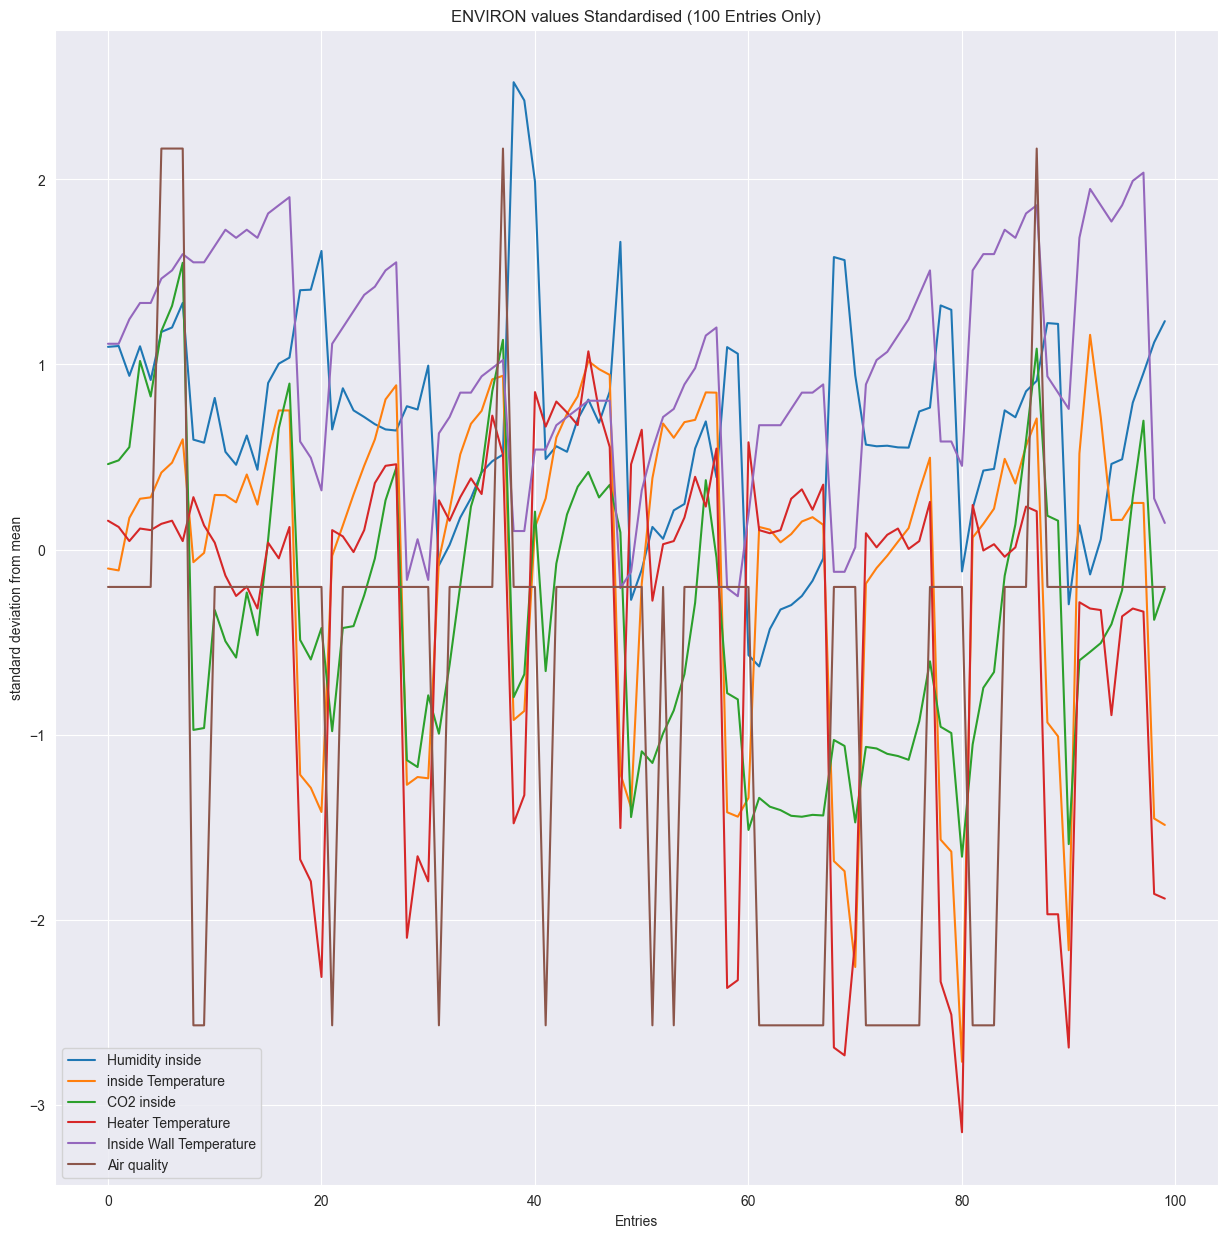

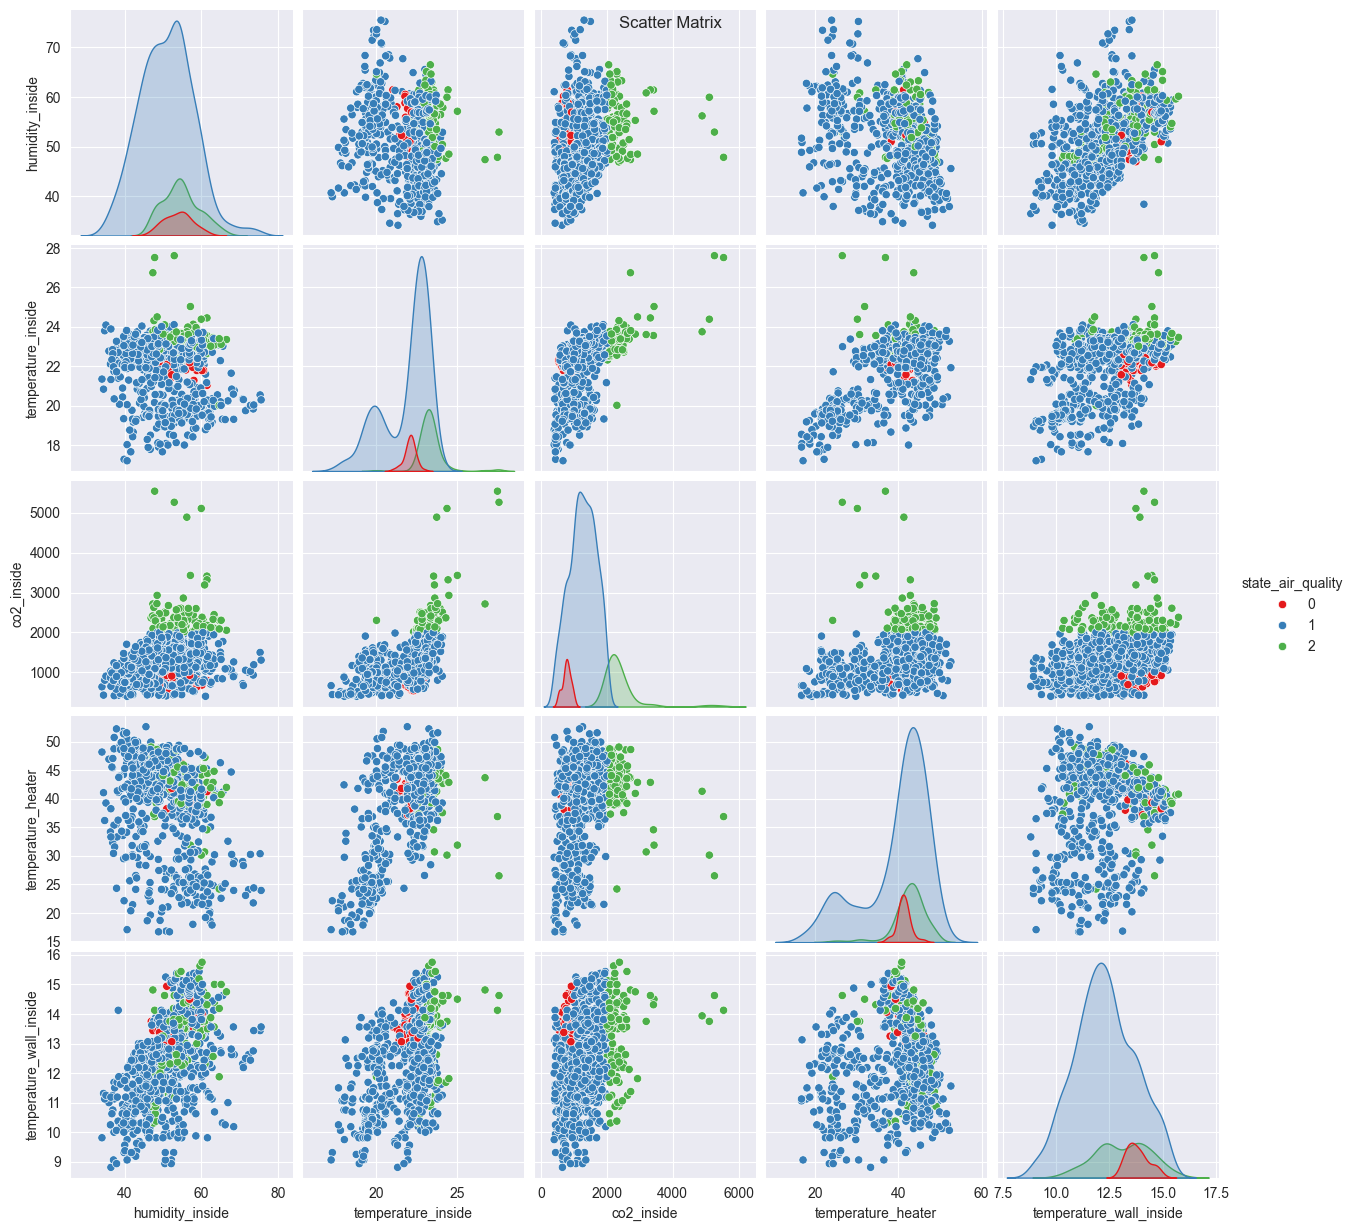

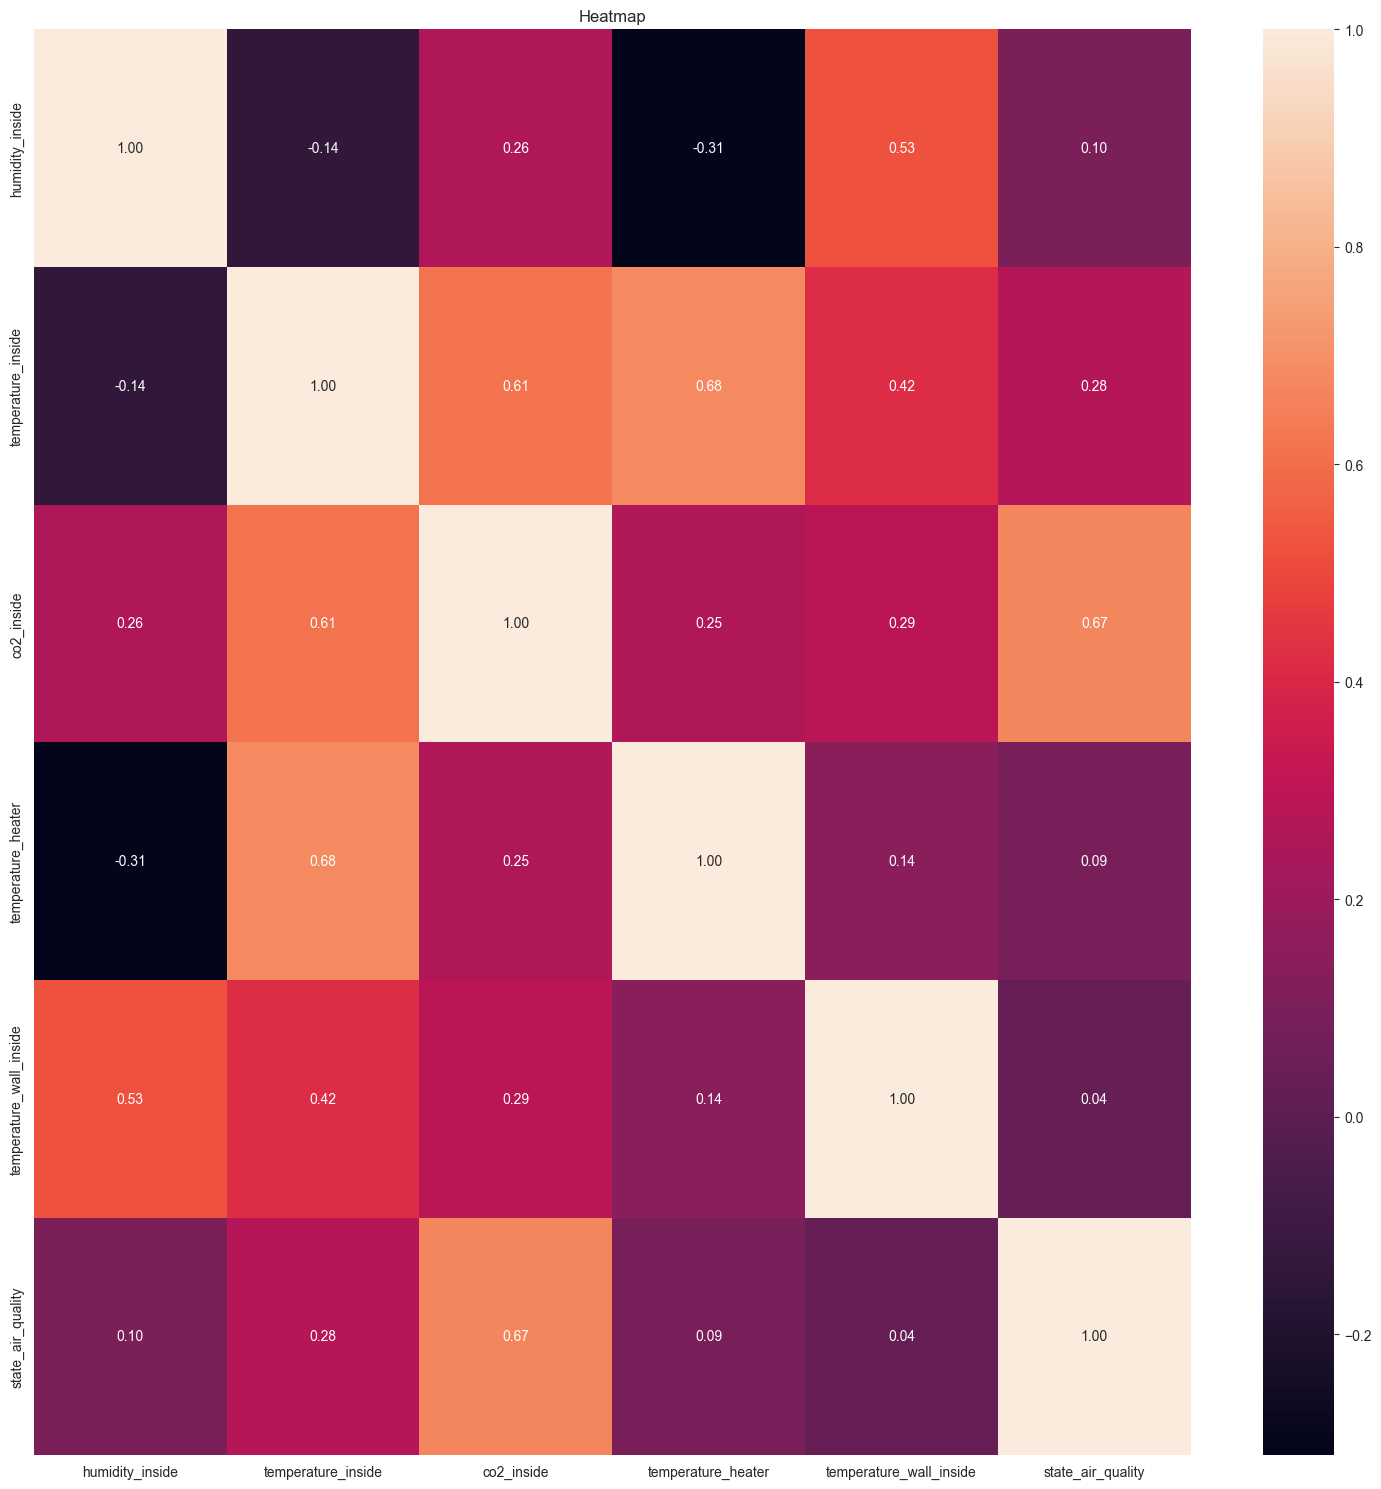

       humidity_inside  temperature_inside   co2_inside  temperature_heater  \
count       916.000000          916.000000   916.000000          916.000000   
mean         51.598799           22.103834  1381.217249           40.034884   
std           6.706102            1.457741   588.854522            7.383326   
min          34.120000           17.194000   395.000000           16.687000   
25%          46.967500           21.577750   978.000000           38.234250   
50%          52.110000           22.589500  1328.500000           42.000000   
75%          55.737500           23.089000  1716.000000           44.812000   
max          75.510000           27.613000  5544.000000           52.625000   

       temperature_wall_inside  state_air_quality  
count               916.000000         916.000000  
mean                 12.482422           1.085153  
std                   1.421408           0.422532  
min                   8.812000           0.000000  
25%                  11.5000

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import k_means
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df = pd.read_csv('rawdata_luftqualitaet.csv', quotechar="'")

print(df.head())

standard = StandardScaler()
# gives the distance from mean in standard_deviation per value
standard_df = pd.DataFrame(standard.fit_transform(df), columns=df.columns)

humidity = standard_df['humidity_inside']
temperature = standard_df['temperature_inside']
co2 = standard_df['co2_inside']
heater = standard_df['temperature_heater']
inside_wall = standard_df['temperature_wall_inside']
air_quality = standard_df['state_air_quality']

plt.figure(figsize=(15,15))
# plt.style.use('dark_background')
plt.title('ENVIRON values Standardised (100 Entries Only)')
plt.plot(humidity[:100], label='Humidity inside')
plt.plot(temperature[:100], label='inside Temperature')
plt.plot(co2[:100], label='CO2 inside')
plt.plot(heater[:100], label='Heater Temperature')
plt.plot(inside_wall[:100], label='Inside Wall Temperature')
plt.plot(air_quality[:100], label='Air quality')
plt.xlabel('Entries')
# ylabel makes the differenz between dark and light mode
# plt.style works as a fix (needs to be placed before configuring diagramm)
plt.ylabel('standard deviation from mean')
plt.legend()

# pd.plotting.scatter_matrix(df, figsize=(15,15), diagonal='kde')

# alt. version mit Seaborn
plt.show()
sns.pairplot(data=df, hue='state_air_quality', palette='Set1')

plt.suptitle('Scatter Matrix')

# also works with sns (but was annoying)
# sns.pairplot(df)

plt.figure(figsize=(15,15))
plt.title('Heatmap')
sns.heatmap(df.corr(), annot=True, fmt='.2f')

plt.tight_layout()
plt.show()

print(df.describe())


### b)
Trennen Sie die Daten in zufälliger Auswahl in zwei disjunkte Datensätze, den Trainings- und den Testdatensatz im Verhältnis 80% zu 20%! (1P)

In [11]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

print('x:', x.shape, 'y:', y.shape)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('X_train:', X_train.shape, ' y_train:', y_train.shape)
print('X_test:', X_test.shape, ' y_test:', y_test.shape)

x: (916, 5) y: (916,)
X_train: (732, 5)  y_train: (732,)
X_test: (184, 5)  y_test: (184,)


### c)
 Normalisieren Sie die Messdaten auf Wertebereiche zwischen 0 und 1 und visualisieren Sie sie als Kontrolle in geeigneter Weise. (1P)

In [12]:
scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

print('X_train:\n', X_train.head())
print('X_test:\n', X_test.head())
print('y_train:\n', y_train.head())
print('y_test:\n', y_test.head())


X_train:
    humidity_inside  temperature_inside  co2_inside  temperature_heater  \
0         0.532013            0.559624    0.186056            0.723468   
1         0.544093            0.544803    0.175374            0.641744   
2         0.554965            0.517291    0.154205            0.657382   
3         0.192075            0.487068    0.067780            0.819133   
4         0.485625            0.538119    0.268207            0.695642   

   temperature_wall_inside  
0                 0.819833  
1                 0.882819  
2                 0.864803  
3                 0.486451  
4                 0.702652  
X_test:
    humidity_inside  temperature_inside  co2_inside  temperature_heater  \
0         0.505065            0.252383    0.061589            0.738728   
1         0.000000            0.513598    0.078834            0.872060   
2         0.321609            0.912995    0.475878            0.778367   
3         0.544457            0.600000    0.506262            0.69

## d)
Trainieren Sie einen MLP-Klassifikator mit dem Trainingsdatensatz und geben Sie die Prognose für die Bewertungen der Luftqualität als Ergebnis aus. Sie können gern mit den Hyperparametern experimentieren, um bessere oder schnellere Ergebnisse im Training zu erzielen. (1P)

In [13]:
# solver=Limited-memory Broyden–Fletcher–Goldfarb–Shanno
clp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 10), random_state=42, max_iter=200)

clp.fit(X_train, y_train)

print(clp.predict(X_train))
print(y_train.tolist())
print('Accuracy:', clp.score(X_train, y_train))

[1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 0 1 1 1 0 1 1 1 1 1 0 1 2 1 2 1 2 1
 1 1 1 1 2 1 2 1 1 1 1 0 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 2
 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 0 1 1 1 1 2 1 1 2 1 1 1 2 0 1 1 2 1 1 1 1 1
 1 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 2 2
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 0 1 1 2 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 2 1 1 1 1 1 0 1 1 1 2 1 1 1 1 0 1 1 2 1 1 1 1 1 1 0 1 1 1 1 2 1
 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 0 1 1 0 2 1 1 2 1 1
 0 1 1 1 1 1 2 0 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 2 1
 1 1 1 1 2 1 1 1 1 1 1 0 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 0 1 2 1 2 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 2 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1 1 2 0 1 2
 1 1 1 1 1 1 1 1 1 1 1 2 

## e)
 Evaluieren Sie das erzielte Ergebnis auf dem Testdatensatz, indem Sie die prognostizierte Bewertung mit der Originalbewertung vergleichen und die Genauigkeit der Klassifikation (accuracy_score) berechnen. (1P)

In [14]:
print(clp.predict(X_test))
print(y_test.tolist())
print('Accuracy:', clp.score(X_test, y_test))

[1 1 2 2 1 1 1 1 1 1 1 1 1 0 2 1 2 1 1 0 1 1 1 1 1 0 2 1 2 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 2 1 0 2 1 2 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 1 0 1 1 2 2 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 2 0 1 1 1 1 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1]
[1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Accuracy: 0.9619565217391305
